# With Preprocessed_EEG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import mne
import pandas as pd

In [ ]:
import numpy as np

# File paths
file_paths = [
    r'E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Merged\SEED_DE_X_for_Merge_3min.npy',
    r'E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Merged\SEED_DE_y_for_Merge_3min.npy',
    r'E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Merged\DEAP_DE_X.npy',
    r'E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Merged\deap_de_y_emotions.npy'
]

# Load files into variables
var1 = np.load(file_paths[0])
var2 = np.load(file_paths[1])
var3 = np.load(file_paths[2])
var4 = np.load(file_paths[3])


In [ ]:
print(var1.shape)
print(var3.shape)

In [ ]:

merged_X = np.concatenate((var1, var3), axis=0)

# Concatenate var2 and var4 into another variable
merged_y = np.concatenate((var2, var4), axis=0)


In [ ]:
from sklearn.utils import shuffle 


data, labels_edited = shuffle(merged_X, merged_y)


In [ ]:
merged_X = data

merged_y = labels_edited

In [ ]:
merged_X.shape

In [ ]:
# Save merged_X to .npy file
np.save('merged_X.npy', merged_X)

# Save merged_y to .npy file
np.save('merged_y.npy', merged_y)

In [14]:

#file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/Preprocessed_EEG/1_20131027.mat'
file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/ExtractedFeatures/1_20131027.mat'
#file_path =  'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/DEAP/data_preprocessed_matlab/s01.mat'

mat_data = sio.loadmat(file_path)


In [15]:
#Explore Variable Names

variable_names = mat_data.keys()
print(variable_names)


dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

In [6]:
data = mat_data['psd_movingAve1']
data[25]


array([[3.50352009e+05, 1.66331804e+04, 1.65428092e+03, 1.19301467e+03,
        3.52431165e+02],
       [3.25396356e+05, 9.88985677e+03, 2.78404164e+03, 1.04468458e+03,
        4.73488158e+02],
       [4.53198878e+05, 1.86594768e+03, 2.50065603e+03, 8.60390406e+02,
        2.45982394e+02],
       ...,
       [8.93890804e+05, 1.12214491e+04, 3.19319311e+03, 1.27820953e+03,
        4.60260101e+02],
       [7.22371330e+05, 1.44283341e+04, 3.78981259e+03, 9.83210382e+02,
        4.34675140e+02],
       [6.17496483e+05, 1.34757033e+04, 3.82325008e+03, 9.64043227e+02,
        4.56051710e+02]])

In [ ]:
import numpy as np

def eliminate_channels(data):
    # Indices of rows to keep
    indices_to_keep = [1, 4, 6, 8, 18, 16, 24, 26, 36, 34, 42, 44, 46, 53, 59, 60, 61, 55, 48, 50, 40, 38, 30, 32, 22, 20, 12, 14, 5, 3, 10, 28]

    # Create a new array to store the selected rows
    new_data = []

    # Append selected rows to new_data
    for i in range(len(indices_to_keep)):
        new_data.append(data[indices_to_keep[i]-1])

    # Convert new_data to a NumPy array
    return np.array(new_data)


In [ ]:
new_data = eliminate_channels(data)


In [ ]:
data = np.array(new_data)

In [ ]:
data[7]

In [ ]:
data.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

signal = s

# Plot the original EEG-like signal
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('Original EEG-like Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Apply Continuous Wavelet Transform (CWT)
wavelet = 'morl'  # Morlet wavelet is commonly used for EEG analysis
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

# Plot the CWT coefficients
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[t[0], t[-1], scales[-1], scales[0]], cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) Coefficients')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.show()


In [ ]:
print(frequencies)
frequencies.shape

In [ ]:
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import numpy as np
import math
import os
from scipy.stats import kurtosis

def calculate_time_domain_features(segment):
    mean_value = np.mean(segment)
    std_dev = np.std(segment)
    var = np.var(segment, ddof=1)
    kurt = kurtosis(segment)
    max_value = np.max(segment)
    return mean_value, std_dev, var, kurt, max_value

datasets_X, datasets_y = [], []
data = mat_data['djc_eeg1']  # Considering all channels

fs = 200
fStart = [1, 4, 8, 14, 31]
fEnd = [3, 7, 13, 30, 50]
all_channels = range(62)

dataset_X = []

for band_index, band in enumerate(fStart):
    b, a = signal.butter(4, [fStart[band_index]/fs, fEnd[band_index]/fs], 'bandpass')
    filtedData = signal.filtfilt(b, a, data)
    features = []
    for lead in all_channels:
        feature = []  # Move this line inside the loop for each channel
        for de_index in range(0, filtedData.shape[1] - fs, fs):
            segment = filtedData[lead, de_index: de_index + fs]
            # Calculate time domain features
            mean_value, std_dev, var, kurt, max_value = calculate_time_domain_features(segment)
            # Append features to the list
            feature.append([mean_value, std_dev, var, kurt, max_value])  
        features.append(feature)

    features = np.array(features)
    dataset_X.append(features)

dataset_X = np.array(dataset_X)
dataset_X = dataset_X.reshape((dataset_X.shape[0], dataset_X.shape[1], -1))

datasets_X.append(dataset_X)

datasets_X = np.array(datasets_X)
print(datasets_X.shape)


In [ ]:
dataset_X_reshaped = dataset_X.reshape((dataset_X.shape[0], dataset_X.shape[1], -1))

# Now dataset_X_reshaped has shape (5, 62, 1175)
print(dataset_X_reshaped.shape)

In [ ]:
new_datasets_X = np.copy(datasets_X)
new_datasets_X = np.transpose(new_datasets_X, (0, 2, 3, 1))
print(new_datasets_X.shape)

In [ ]:
for trial_index in range(1, 16):  # Assuming trial indices are from 1 to 15
    # Replace 'djc_eeg1' with the corresponding variable name containing EEG data for each trial
    variable_name = f'djc_eeg{trial_index}'
    eeg_data = mat_data[variable_name]

    # Print the shape of the EEG data for this trial
    print(f"Shape of EEG data for trial {trial_index}: {eeg_data.shape}")

# Load a signle channel data of a trial

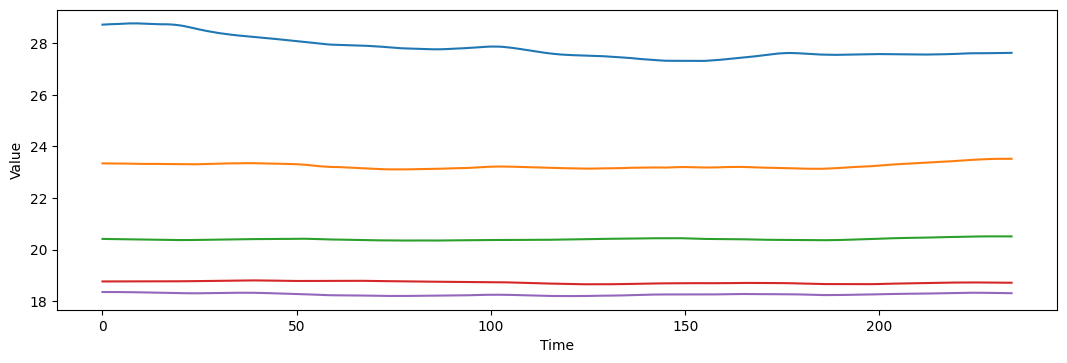

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Choose the channel index for plotting (0 for the first channel, 1 for the second channel, and so on)
channel_index = 4

# Assuming mat_data is your loaded .mat file
eeg_trial_data = mat_data['de_LDS1']

# Get the EEG data for the chosen channel
eeg_channel_data = eeg_trial_data[channel_index, :]

# Selecting only the first column of eeg_channel_data
eeg_channel_data_first_column = eeg_channel_data[:, 0]

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz as mentioned in the dataset description)
sampling_rate = 200
time_vector = np.arange(len(eeg_channel_data_first_column)) / sampling_rate

import matplotlib.pyplot as plt

# Assuming eeg_trial_data is your data array

plt.figure(figsize=(10, 3))
plt.plot(eeg_trial_data[2, :, :])
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("smoothed_data.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




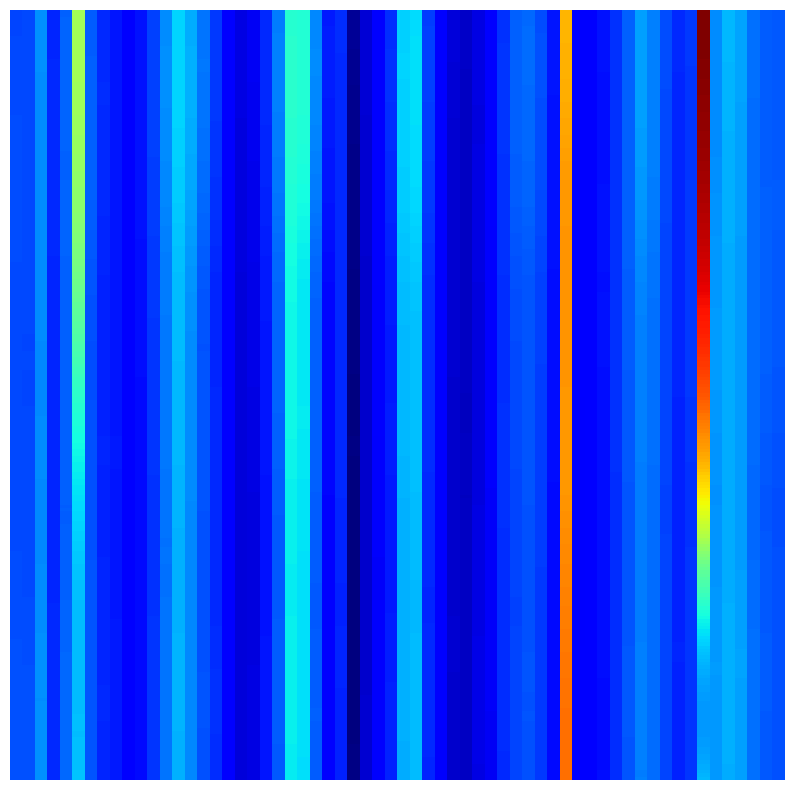

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming eeg_trial_data is your data
# (62, 265, 5) means (channels, time, trials)
# So, to plot all the data as an image:

# Transpose the data to have time on x-axis and channels on y-axis
# This is to make the plot more interpretable
eeg_trial_data_transposed = np.transpose(eeg_trial_data, (1, 0, 2))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(eeg_trial_data_transposed[:, :, 4], aspect='auto', cmap='jet', origin='lower')
plt.axis('off')  # Turn off the axis
plt.savefig('eeg_trial_data.png', bbox_inches='tight', pad_inches=0)  # Save without borders
plt.show()


In [ ]:
# Plot EEG waves
plt.plot(eeg_trial_data[2, :, 0], label='Delta')
plt.plot(eeg_trial_data[2, :, 1], label='Theta')
plt.plot(eeg_trial_data[2, :, 2], label='Alpha')
plt.plot(eeg_trial_data[2, :, 3], label='Beta')
plt.plot(eeg_trial_data[2, :, 4], label='Gamma')

plt.xlabel("Time", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.tick_params(axis='both', which='both', length=0, width=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.legend(loc='upper right', fontsize=12)
plt.savefig("smoothed_data.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# Train Test Fig

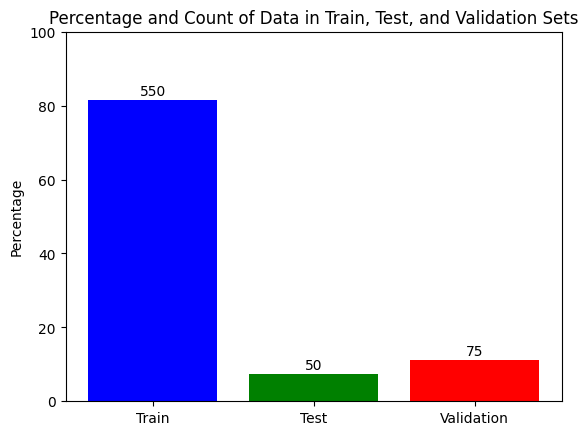

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined the variables data and labels_edited

data  = np.load(r"E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Practice with datasets\Seed\de_LDS_Extracted\Shuffled X y\shuffled_data1.npy")
labels_edited  = np.load(r"E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Practice with datasets\Seed\de_LDS_Extracted\Shuffled X y\shuffled_labels1.npy")

# Splitting Dataset into train, validation, test
train_labels = labels_edited[0:550]
test_labels = labels_edited[550:600]
final_labels = labels_edited[600:675]

train_data = data[0:550]
test_data = data[550:600]
final_test = data[600:675]

# Calculate percentages and counts
total_samples = len(labels_edited)
train_percent = len(train_labels) / total_samples * 100
test_percent = len(test_labels) / total_samples * 100
final_percent = len(final_labels) / total_samples * 100

train_count = len(train_labels)
test_count = len(test_labels)
final_count = len(final_labels)

# Plotting
labels = ['Train', 'Test', 'Validation']
percentages = [train_percent, test_percent, final_percent]
counts = [train_count, test_count, final_count]

plt.bar(labels, percentages, color=['blue', 'green', 'red'])

# Add count numbers above the bars
for i, count in enumerate(counts):
    plt.text(i, percentages[i] + 0.5, str(count), ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Percentage and Count of Data in Train, Test, and Validation Sets')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.show()


# Mooving avg filter


In [ ]:
import numpy as np

# Load the npy file
file_path = "E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/Features Extracted Own/Shuffled/Time/shuffled_X.npy"
data = np.load(file_path)

# Verify the shape of the loaded data
print("Shape of the loaded data:", data.shape)


In [ ]:
# Normalize the data
normalized_data = (data - np.mean(data)) / np.std(data)

In [ ]:
import pandas as pd

# Define the window size for the moving average filter
window_size = 300

# Apply the moving average filter
smoothed_data = np.zeros_like(normalized_data)
for i in range(normalized_data.shape[0]):
    for j in range(normalized_data.shape[1]):
        for k in range(normalized_data.shape[3]):
            series = pd.Series(normalized_data[i, j, :, k])
            smoothed_data[i, j, :, k] = series.rolling(window=window_size, center=True, min_periods=1).mean()

# Visualize the smoothed data
plt.plot(smoothed_data[1, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Smoothed Value")
plt.show()


In [ ]:
# Visualize the smoothed data
plt.plot(smoothed_data[6, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Smoothed Value")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the window size for the moving average filter
window_size = 300

# Apply the moving average filter
smoothed_data = np.zeros_like(normalized_data)
for i in range(normalized_data.shape[0]):
    for j in range(normalized_data.shape[1]):
        for k in range(normalized_data.shape[3]):
            
            smoothed_data[i, j, :, k] = pd.Series(normalized_data[i, j, :, k]).rolling(window=window_size, center=True).mean()

# Visualize the smoothed data
plt.plot(smoothed_data[0, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Smoothed Value")
plt.show()


In [ ]:
import numpy as np

# Replace NaN values with zeros
non_nan_data = np.nan_to_num(smoothed_data, nan=0)


In [ ]:
# Visualize the smoothed data
plt.plot(non_nan_data[0, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Smoothed Value")
plt.show()

In [ ]:
import numpy as np

# Find the starting and ending indices of non-zero values along the third axis
start_idx = np.nonzero(non_nan_data.any(axis=(0, 1, 3)))[0][0]
end_idx = np.nonzero(non_nan_data.any(axis=(0, 1, 3)))[0][-1] + 1

# Split the array along the third axis based on the starting and ending indices
split_data = non_nan_data[:, :, start_idx:end_idx, :]


In [ ]:
data = split_data

In [ ]:
data.shape

In [ ]:
# Visualize the smoothed data
plt.plot(data[0, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Smoothed Value")
plt.show()

In [ ]:
data[0, 2, :, 4]

In [13]:
import numpy as np

# Load the shuffled_data1.npy file
data = np.load(r'E:\STUDY\Publications\Thesis\Brain Emotion Detection\Dataset\Practice with datasets\deap\Shuffled\TIme\DEAP_Time_X.npy')

# Check the shape of the data
print("Shape of the data:", data.shape)


Shape of the data: (1280, 32, 168, 4)


# delta, theta, alpha, beta, gamma waves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Function to apply bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Choose the channel index for plotting (0 for the first channel, 1 for the second channel, and so on)
channel_index = 22

# Assuming mat_data and sampling_rate are defined
eeg_trial_data = mat_data['djc_eeg2']

# Get the EEG data for the chosen channel
eeg_channel_data = eeg_trial_data[channel_index, :]

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz as mentioned in the dataset description)
sampling_rate = 200
time_vector = np.arange(len(eeg_channel_data)) / sampling_rate

# Define the time range to plot (e.g., from 30 to 40 seconds)
start_time = 30
end_time = 40
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Apply a moving average for smoothing
window_size = 5  # Adjust the window size as needed
eeg_channel_data_smoothed = np.convolve(eeg_channel_data, np.ones(window_size)/window_size, mode='valid')

# Reduce the number of points in 1 second for better visualization
downsampling_factor = 10
time_vector_downsampled = time_vector[start_index:end_index:downsampling_factor]

# Define frequency bands
frequency_bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 14),
    'beta': (14, 30),
    'gamma': (30, 50)
}

# Plot the main EEG data in dark red (chocolate)
plt.figure(figsize=(20, 6))
plt.plot(time_vector_downsampled, eeg_channel_data[start_index:end_index:downsampling_factor], color='darkred', label='Main EEG Data')

# Apply bandpass filters to extract sub-bands
delta_data = bandpass_filter(eeg_channel_data, *frequency_bands['delta'], fs=sampling_rate)
theta_data = bandpass_filter(eeg_channel_data, *frequency_bands['theta'], fs=sampling_rate)
alpha_data = bandpass_filter(eeg_channel_data, *frequency_bands['alpha'], fs=sampling_rate)
beta_data = bandpass_filter(eeg_channel_data, *frequency_bands['beta'], fs=sampling_rate)
gamma_data = bandpass_filter(eeg_channel_data, *frequency_bands['gamma'], fs=sampling_rate)

# Plot the EEG sub-bands
plt.figure(figsize=(20, 12))

plt.subplot(6, 1, 1)
plt.plot(time_vector_downsampled, eeg_channel_data[start_index:end_index:downsampling_factor], color='darkred', label='EEG Signal')
plt.title('Main EEG Data')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(6, 1, 2)
plt.plot(time_vector_downsampled, delta_data[start_index:end_index:downsampling_factor], color='lightcoral')
plt.title('Delta Band (1-4 Hz)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(6, 1, 3)
plt.plot(time_vector_downsampled, theta_data[start_index:end_index:downsampling_factor], color='lightcoral')
plt.title('Theta Band (4-8 Hz)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(6, 1, 4)
plt.plot(time_vector_downsampled, alpha_data[start_index:end_index:downsampling_factor], color='lightcoral')
plt.title('Alpha Band (8-14 Hz)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(6, 1, 5)
plt.plot(time_vector_downsampled, beta_data[start_index:end_index:downsampling_factor], color='lightcoral')
plt.title('Beta Band (14-30 Hz)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(6, 1, 6)
plt.plot(time_vector_downsampled, gamma_data[start_index:end_index:downsampling_factor], color='lightcoral')
plt.title('Gamma Band (30-50 Hz)')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Adjust layout
plt.tight_layout()

# Show legend for the main EEG data
plt.legend()

# Save the plot as a high-quality PNG image
plt.savefig('eeg_subbands.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
